<a href="https://colab.research.google.com/github/diana-rahma/Machine-Learning_Ganjil25_11/blob/main/UTS_ML_11_Diana_Rahmawati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS MACHINE LEARNING

Nama: Diana Rahmawati <br>
Kelas: TI - 3G <br>
NIM: 2341720126 <br>
No. Absen: 11

# TUGAS STUDI KASUS PEMBELAJARAN MESIN
Clustering dan Approximate Nearest Neighbor (ANN)

Deskripsi Umum:
Tugas kali ini adalah mengerjakan studi kasus analisis data dan clustering menggunakan unsupervised learning dengan langkah-langkah sebagai berikut:
1. Preprocessing data
- Tangani missing values (imputasi mean/median/modus sesuai jenis data)
- Normalisasi atau standarisasi data
- Buat minimal satu fitur baru hasil kombinasi fitur lama
2.	Clustering
- Terapkan K-Means dan DBSCAN
- Bandingkan hasil clustering menggunakan:
a. Silhouette Score
b. Davies-Bouldin Index
3.	Approximate Nearest Neighbor (ANN)
- Gunakan Annoy untuk mencari tetangga terdekat dari beberapa query points hasil clustering
- Tampilkan output berupa:
a. Index query point
b. Daftar tetangga terdekat yang ditemukan
c. Nilai jarak kemiripan

# Dataset:
Tugas 2 — Credit Card Dataset. <br>
Untuk mahasiswa dengan nomor absen 2, 5, 8, dst.
- Dataset: Credit Card Dataset for Clustering
- Deskripsi: Dataset ini berisi data perilaku pengguna kartu kredit. Gunakan untuk menemukan kelompok pelanggan berdasarkan pola penggunaan.
- Langkah tambahan:
- Tangani missing values dan normalisasi fitur numerik.
- Buat fitur baru seperti rasio antara BALANCE dan PURCHASES.

In [2]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=d2b2449d1f886c0af4507438c28f1565a9a960336f9c14ccdaecdd257cbd9dea
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset_path = '/content/drive/MyDrive/ML/UCI_Credit_Card.csv'
df = pd.read_csv(dataset_path)

df.info()
display(df.describe())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [13]:
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"   - {col}: diisi dengan median = {median_val:.2f}")


In [24]:
# buat fitur baru

df['BALANCE_RATIO'] = (
    df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
    / df['LIMIT_BAL']
)

total_bill = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
total_payment = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

df['PAYMENT_RATIO'] = total_payment / (total_bill.replace(0, np.nan))
df['PAYMENT_RATIO'] = df['PAYMENT_RATIO'].fillna(0)

df[['BALANCE_RATIO', 'PAYMENT_RATIO']].head()


,BALANCE_RATIO,PAYMENT_RATIO
0,0.064200,0.089434
1,0.023718,0.292791
2,0.188246,0.108388
3,0.771113,0.036259
4,0.364463,0.540054


In [25]:
# normalisasi

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


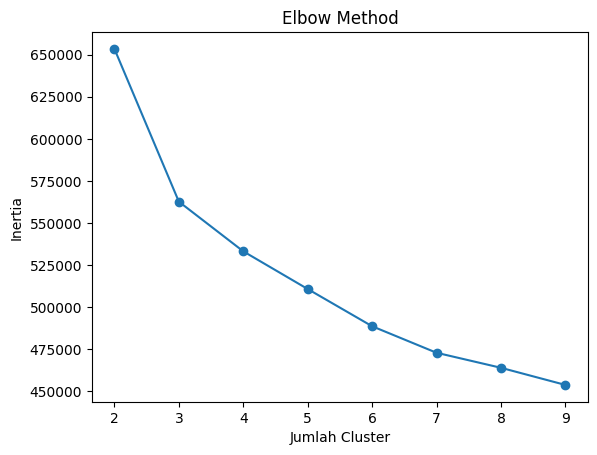

In [26]:
#clustering kmeans

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [42]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)


In [47]:
# Clustering DBSCan

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)


In [49]:
# evaluasi hasil clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_sil = silhouette_score(df_scaled, df_scaled['KMeans_Cluster'])
dbscan_sil = silhouette_score(df_scaled, df_scaled['DBSCAN_Cluster'])

kmeans_db = davies_bouldin_score(df_scaled, df_scaled['KMeans_Cluster'])
dbscan_db = davies_bouldin_score(df_scaled, df_scaled['DBSCAN_Cluster'])

print(f"K-Means -> Silhouette: {kmeans_sil:.3f}, Davies-Bouldin: {kmeans_db:.3f}")
print(f"DBSCAN  -> Silhouette: {dbscan_sil:.3f}, Davies-Bouldin: {dbscan_db:.3f}")


K-Means -> Silhouette: 0.836, Davies-Bouldin: 0.488
DBSCAN  -> Silhouette: 0.054, Davies-Bouldin: 0.763


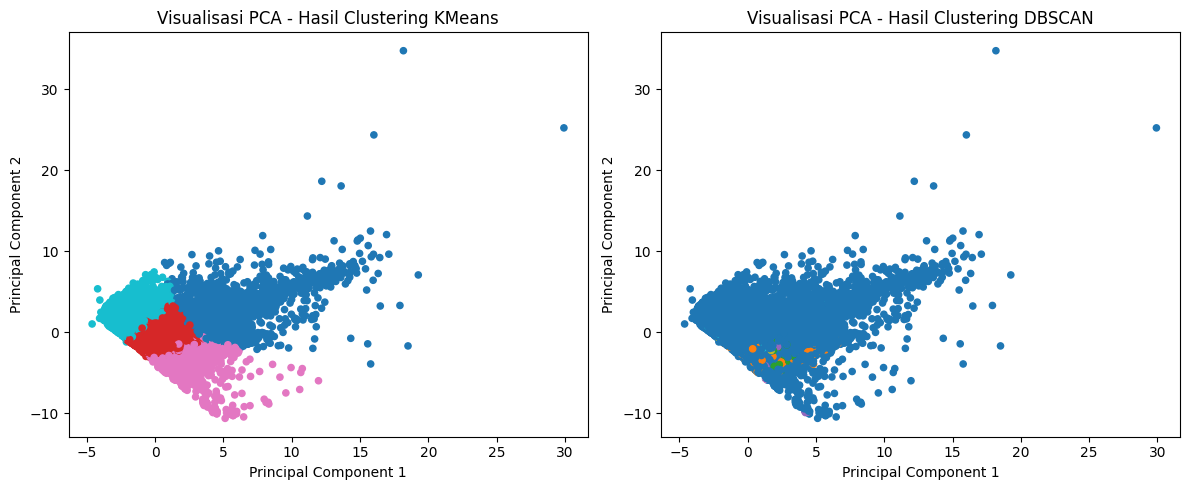

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_features = df_scaled.drop(['KMeans_Cluster', 'DBSCAN_Cluster'], axis=1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_features)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['KMeans_Cluster'] = df_scaled['KMeans_Cluster']
pca_df['DBSCAN_Cluster'] = df_scaled['DBSCAN_Cluster']

# --- Visualisasi hasil clustering KMeans ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['KMeans_Cluster'], cmap='tab10', s=20
)
plt.title('Visualisasi PCA - Hasil Clustering KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# --- Visualisasi hasil clustering DBSCAN ---
plt.subplot(1, 2, 2)
plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['DBSCAN_Cluster'], cmap='tab10', s=20
)
plt.title('Visualisasi PCA - Hasil Clustering DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [36]:
# ANN

f = df_scaled.shape[1] - 2
ann_index = AnnoyIndex(f, 'euclidean')

for i, row in enumerate(df_scaled.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster']).values):
    ann_index.add_item(i, row)
ann_index.build(10)

query_points = np.random.choice(df_scaled.index, size=5, replace=False)

print("=== HASIL APPROXIMATE NEAREST NEIGHBOR (Annoy) ===\n")
for q in query_points:
    neighbors, distances = ann_index.get_nns_by_item(q, 5, include_distances=True)
    print(f"Query Index: {q}")
    print("Tetangga Terdekat:", neighbors)
    print("Jarak:", distances)
    print("-" * 60)


=== HASIL APPROXIMATE NEAREST NEIGHBOR (Annoy) ===

Query Index: 15246
Tetangga Terdekat: [15246, 10783, 15736, 17501, 19486]
Jarak: [0.0, 0.7862605452537537, 0.8010069131851196, 1.0439658164978027, 1.109324336051941]
------------------------------------------------------------
Query Index: 16914
Tetangga Terdekat: [16914, 16838, 18198, 15013, 24558]
Jarak: [0.0, 1.7073159217834473, 1.8731894493103027, 2.291090488433838, 2.3765039443969727]
------------------------------------------------------------
Query Index: 13699
Tetangga Terdekat: [13699, 14227, 14659, 11717, 12417]
Jarak: [0.0, 0.5706198811531067, 0.5840349197387695, 0.6350910067558289, 0.7013837099075317]
------------------------------------------------------------
Query Index: 3220
Tetangga Terdekat: [3220, 828, 10280, 3611, 6592]
Jarak: [0.0, 7.341620445251465, 8.07203197479248, 8.589476585388184, 10.46661376953125]
------------------------------------------------------------
Query Index: 26697
Tetangga Terdekat: [26697, 266